In [1]:
import matplotlib.pyplot as plt
import re
from scipy import stats
import numpy as np
import math
import matplotlib as mpl

WARNING: The systems list uses an old naming scheme, but the data hasn't been calculated using the 

In [2]:
systems = ['WT','NPG','ASV','SVD']
replicas = [1,2,3,4,5]

In [3]:
data = []
all_systems = []
for sys in systems:
    for rep in replicas:
        all_systems.append(f"{sys} {rep}")
        sub_data = []
        with open(f'my_pocket_{sys}-{rep}/mdpout_descriptors.txt','r') as f:
            for line in f:
                if "snapshot" not in line:
                    pock_vol = float(re.split('\s+', line)[1])
                    sub_data.append(pock_vol)
        data.append(sub_data)

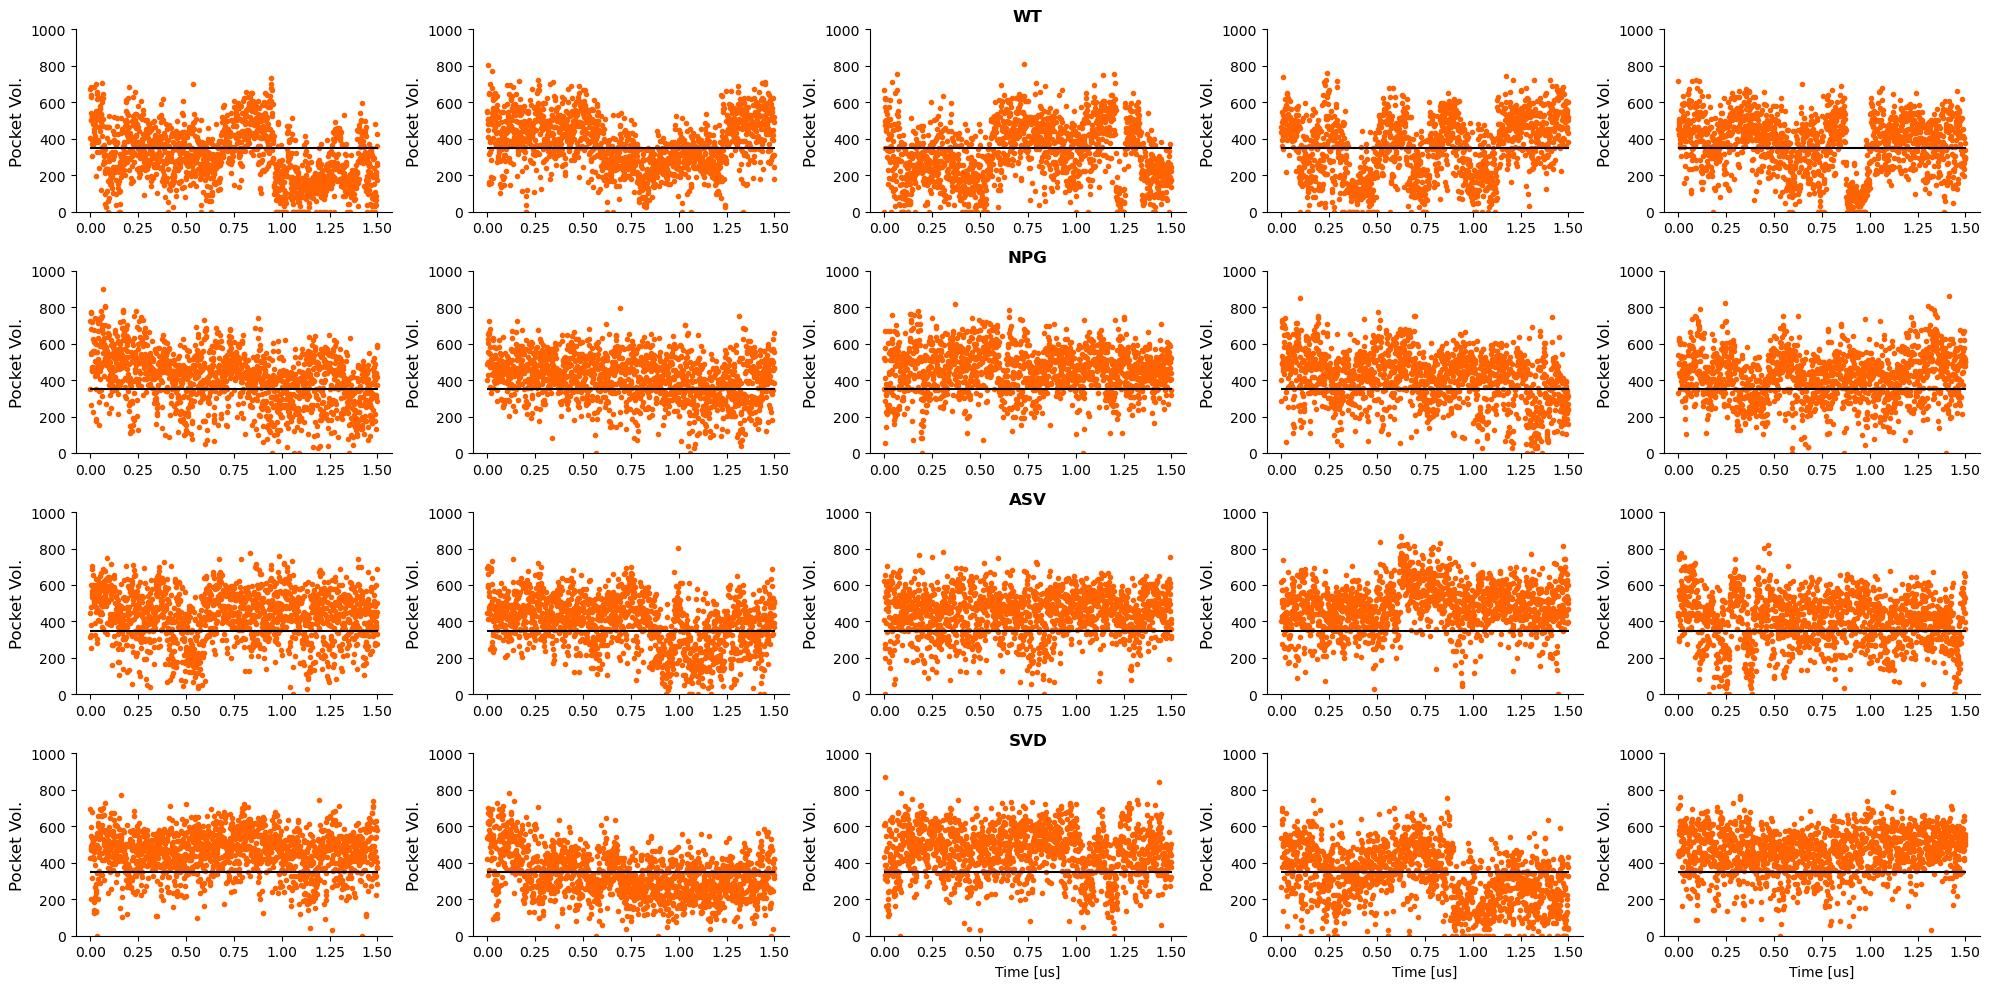

In [4]:
# Fold
cols = 5
rows = len(systems)
fig, ax = plt.subplots(rows, cols, figsize=(20, 10))
ax = ax.flatten()

flag = 0
for n in range(cols*rows):
    if n < len(data):
        ax[n].plot([x/1000 for x in range(len(data[n]))], data[n], '.', color='#FF6200')
        ax[n].hlines(350, 0, len(data[n])/1000, color='Black')
        
        if n%5 == 0:
            ax[n+2].set_title(f'{systems[flag]}',fontsize=12, weight='bold')
            flag += 1
        
        ax[n].set_ylabel('Pocket Vol.',fontsize=12)
        if n > (cols*rows-4):
            ax[n].set_xlabel('Time [us]',fontsize=10)
        ax[n].set_ylim(0, 1000)
        #ax[n].set_xlim(0, 1)
        ax[n].spines['right'].set_visible(False)
        ax[n].spines['top'].set_visible(False)
    else: 
        ax[n].remove()
    
plt.tight_layout()
plt.savefig('Pocket_Vol_TS_WT-to.png',dpi=360)

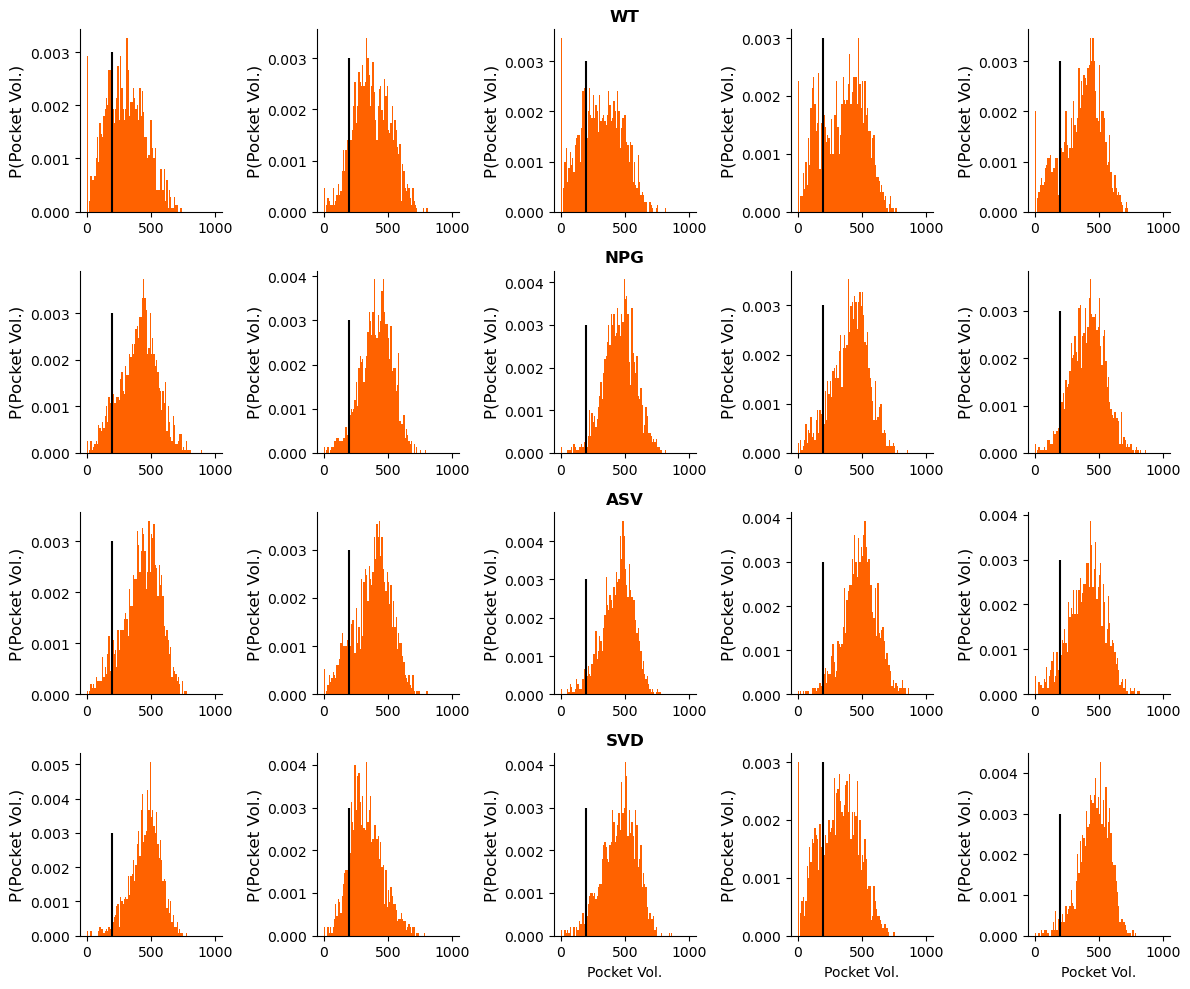

In [5]:
# Fold
cols = 5
rows = len(systems)
fig, ax = plt.subplots(rows, cols, figsize=(12, 10))
ax = ax.flatten()

flag = 0
for n in range(cols*rows):
    if n < len(data):
        #ax[n].plot([x/1000 for x in range(len(data[n]))], data[n], '.', color='#FF6200')
        ax[n].hist(data[n], range=[0,1000], bins=100, color='#FF6200', density=True)
        ax[n].vlines(200, 0, 0.003, color='Black')
        
        if n%5 == 0:
            ax[n+2].set_title(f'{systems[flag]}',fontsize=12, weight='bold')
            flag += 1
        
        ax[n].set_ylabel('P(Pocket Vol.)',fontsize=12)
        if n > (cols*rows-4):
            ax[n].set_xlabel('Pocket Vol.',fontsize=10)
        #ax[n].set_ylim(2, 10)
        #ax[n].set_xlim(0, 1)
        ax[n].spines['right'].set_visible(False)
        ax[n].spines['top'].set_visible(False)
    else: 
        ax[n].remove()
    
plt.tight_layout()
#plt.savefig('TS_K745-D855_WT-to.png',dpi=360)

# Probability of the Pocket Size Being Smaller or Larger than 350 Ang. (Ligand Volume)

In [6]:
#Fold
final_data = []
final_data_err = []
cut = 350
count = 0
for sys in systems:
    print(sys)
    sys_bigger   = []
    sys_smaller = []
    for rep in replicas:
        #print(f"{sys} {rep}")
        bigger = 0
        smaller = 0
        for dat in data[count]:
            if dat > cut:
                bigger += 1
            elif dat < cut:
                smaller += 1
        rep_bigger = bigger/len(data[count])
        sys_bigger.append(rep_bigger)
        rep_smaller = smaller/len(data[count])
        sys_smaller.append(rep_smaller)
        print(f"{rep_bigger:0.2f} {rep_smaller:0.2f}")
        count += 1
    print('----- Mean of Means ----------')
    print(f"{np.mean(sys_bigger):0.2f} {np.mean(sys_smaller):0.2f}")
    final_data.append([sys, np.mean(sys_bigger), np.mean(sys_smaller)])
    final_data_err.append([sys, np.std(sys_bigger), np.std(sys_smaller)])
    print('------------------------------')

WT
0.38 0.62
0.54 0.46
0.44 0.56
0.53 0.47
0.60 0.40
----- Mean of Means ----------
0.50 0.50
------------------------------
NPG
0.68 0.32
0.71 0.29
0.83 0.17
0.69 0.31
0.69 0.31
----- Mean of Means ----------
0.72 0.28
------------------------------
ASV
0.74 0.26
0.63 0.37
0.80 0.20
0.87 0.13
0.67 0.33
----- Mean of Means ----------
0.74 0.26
------------------------------
SVD
0.83 0.17
0.41 0.59
0.79 0.21
0.44 0.56
0.85 0.15
----- Mean of Means ----------
0.66 0.34
------------------------------


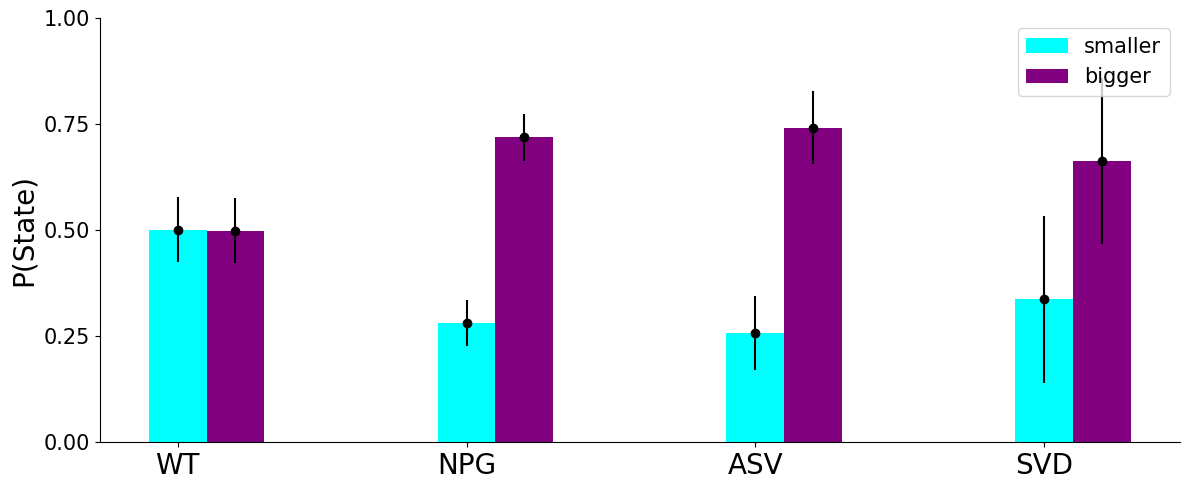

In [7]:
# Fold
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

X = ["WT", "NPG", "ASV", "SVD"]

smaller_state = [x[2] for x in final_data]
smaller_err = [x[2] for x in final_data_err]
bigger_state = [x[1] for x in final_data]
bigger_err = [x[1] for x in final_data_err]

X_axis = np.arange(len(X))

ax.bar(X_axis + 0.0, smaller_state, 0.2, label = 'smaller', color = 'Cyan')
ax.errorbar(X_axis - 0.0, smaller_state, yerr=smaller_err, fmt="o", color="Black")
ax.bar(X_axis + 0.2, bigger_state, 0.2, label = 'bigger', color = 'Purple')
ax.errorbar(X_axis + 0.2, bigger_state, yerr=bigger_err, fmt="o", color="Black")

ax.set_ylim(0,1.0)
ax.set_ylabel('P(State)',fontsize='20')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.yticks([0.0, 0.25, 0.50, 0.75, 1.0],fontsize=15)
plt.xticks(X_axis, X,fontsize=20)


plt.legend(fontsize=15)
plt.tight_layout()